<h2> import libaries</h2>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as nm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

<h2> data reading</h2>

In [ ]:
dataset=pd.read_csv("Framingham.csv")
dataset.head()

<h2>data processing</h2>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<h4> formed correlation </h4>

<Axes: >

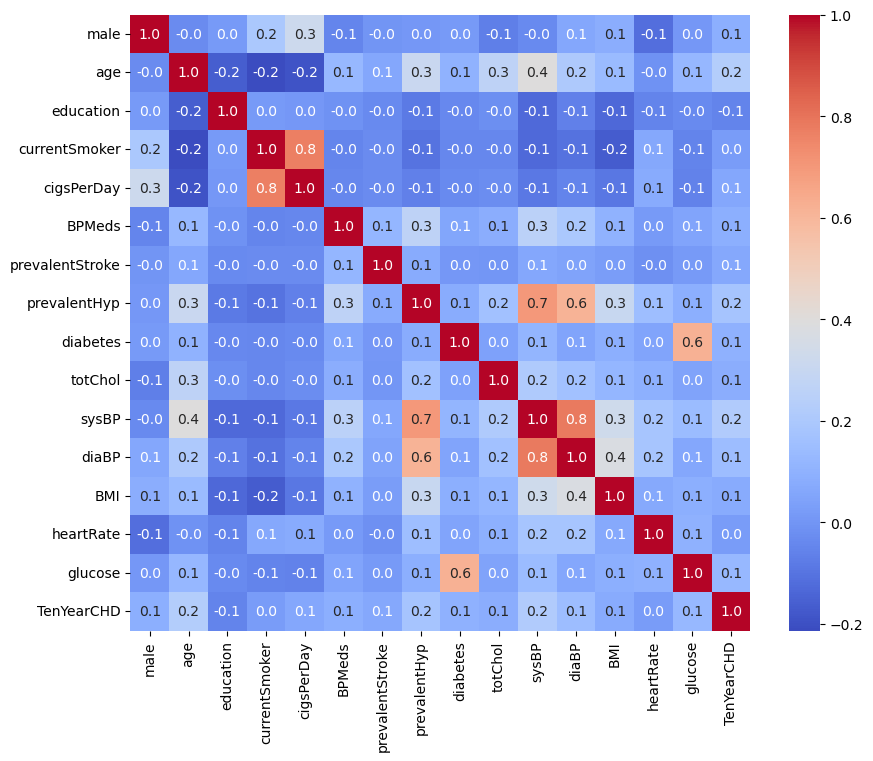

In [5]:
corr_mat=dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap="coolwarm", fmt='0.1f')

<h4>fill the null values</h4>

In [6]:
dataset.fillna(dataset.mean(),inplace=True)

In [7]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<h2>feature selection</h2>

In [8]:
x=dataset.drop(columns=["TenYearCHD"])# all columns for input except Tenyearchd

In [9]:
y=dataset["TenYearCHD"]


<h2>data validation<h2>

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<h2> model_preparation</h2>

In [11]:
model_ls=LogisticRegression(max_iter=10000)#kaise padhana h


<h2>model_fitting</h2>

In [12]:
model_ls.fit(x_train,y_train)#kya padhana haii

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


<h2> model evolution by prediction</h2>

In [13]:
y_predict=model_ls.predict(x_test)

In [14]:
accuracy=accuracy_score(y_test,y_predict)
print( "accuracy=" ,accuracy*100)
conf_matrix=confusion_matrix(y_test,y_predict)
print("\nconfusion matrix-\n",conf_matrix)
class_report=classification_report(y_test,y_predict)
print(" \nclassification_report-\n",class_report)

accuracy= 86.16352201257862

confusion matrix-
 [[1076    8]
 [ 168   20]]
 
classification_report-
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.71      0.11      0.19       188

    accuracy                           0.86      1272
   macro avg       0.79      0.55      0.55      1272
weighted avg       0.84      0.86      0.82      1272



<h2>user prediction from model</h2>

In [ ]:
#take user input
user_input={
    "male":[int(input("Enter 1 for male,0 for female"))],
    "age":[int(input("enter age"))],
    "education":[float(input("enter education (1-4)"))],
    "currentSmoker":[int(input("enter 1 for smoke, 0 for nonsmoke"))],
    "cigsPerDay":[float(input("cig per day"))],
    "BPMeds":[float(input("enter bp"))],
    "prevalentStroke":[int(input("enter 1 for stroke ,0 for non stroke"))],
    "prevalentHyp":[int(input("enter 1 for hyprtension,0 for nonhypertension"))],
    "diabetes":[int(input("enter diabeties for 1, non diabeties for 0"))],
    "totChol":[float(input("enter total cholestrol"))],
    "sysBP":[float(input("enter total sysbp"))],
    'diaBP':[float(input("Enter diaBP"))],
    'BMI':[float(input("Enter BMI"))],
    'heartRate':[float(input("Enter heartrate"))],
    'glucose':[float(input("Enter glucose level"))]
}
user_dataset=pd.DataFrame(user_input)
   




   



In [ ]:
pred_user=model_ls.predict(user_dataset)
print("chance of chd=",pred_user)